In [1]:
import numpy as np
import pandas as pd

from sklearn.manifold import MDS
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

# Load data
Data from parties' opinions on all "stemtest" statements. 1 means the party agrees to the statement, 0 means the party disagrees.

https://www.vrt.be/vrtnws/nl/kies19/stemtest/

Original data from UAntwerpen, De Standaard, VRT NWS, Tree company, Wieni, UCLouvain, RTBF, La Libre

In [3]:
regions = ['Vlaanderen', 'Federaal', 'Europa']
data = {r: pd.read_excel('Stemtest.xlsx', sheet_name=r) for r in regions}

In [4]:
data['Vlaanderen'].T

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
sp.a,1,0,1,0,0,1,0,0,1,1,...,0,1,1,1,0,0,0,0,0,1
Groen,1,0,1,0,1,0,0,0,1,1,...,1,1,1,1,1,0,0,0,0,1
PVDA,1,0,1,0,1,1,1,0,1,0,...,1,1,1,1,0,0,0,0,0,1
CD&V,0,0,0,1,1,1,0,0,1,1,...,1,0,0,0,0,0,1,0,0,0
Open Vld,1,0,1,0,1,1,0,0,0,1,...,0,1,1,1,0,0,0,0,1,0
N-VA,1,1,0,1,0,1,0,1,0,1,...,1,0,1,0,0,0,1,0,0,0
Vlaams Belang,1,1,0,1,1,1,1,0,0,1,...,1,0,1,0,0,1,1,1,1,0


In [5]:
party_logos = [
    'logos/spa.png',
    'logos/groen.png',
    'logos/pvda.png',
    'logos/cdv.png',
    'logos/openvld.png',
    'logos/nva.png',
    'logos/vlaamsbelang.png'
]

# PCA

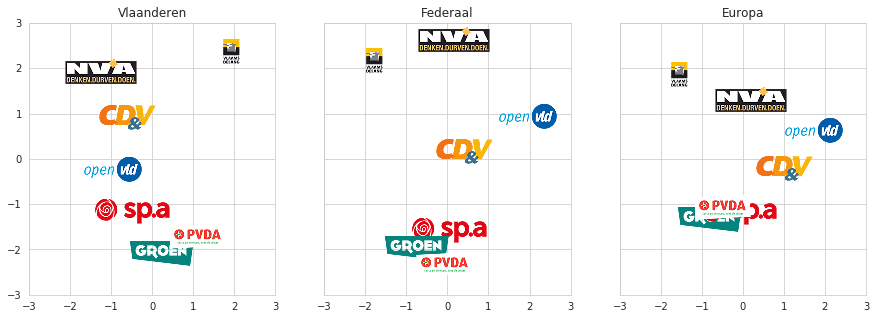

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

for i, region in enumerate(regions):
    table = data[region]
    pca = PCA(n_components=2, random_state=26)
    similarities = pca.fit_transform(table.T)
    x = similarities[:,1]
    y = similarities[:,0]

    for x0, y0, image_path in zip(x, y, party_logos):
        imscatter(x0, y0, image_path, zoom=0.5, ax=axes[i])
    
    axes[i].set_title(region)
    axes[i].set_ylim(-3, 3)
    axes[i].set_xlim(-3, 3)

#plt.suptitle('PCA')
plt.savefig('PCA.png', transparent=False)
plt.show()

# MDS

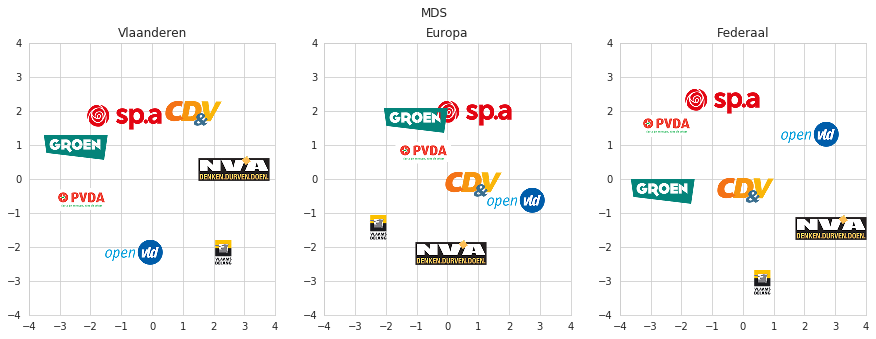

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (region, table) in enumerate(data.items()):
    mds = MDS(n_components=2, n_init=50, random_state=26)
    similarities = mds.fit_transform(table.T)
    x = similarities[:,1]
    y = similarities[:,0]

    for x0, y0, image_path in zip(x, y, party_logos):
        imscatter(x0, y0, image_path, zoom=0.5, ax=axes[i])
    
    axes[i].set_title(region)
    axes[i].set_ylim(-4, 4)
    axes[i].set_xlim(-4, 4)

plt.suptitle('MDS')
plt.savefig('MDS.png', transparent=False)
plt.show()